In [2]:
!pip install ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

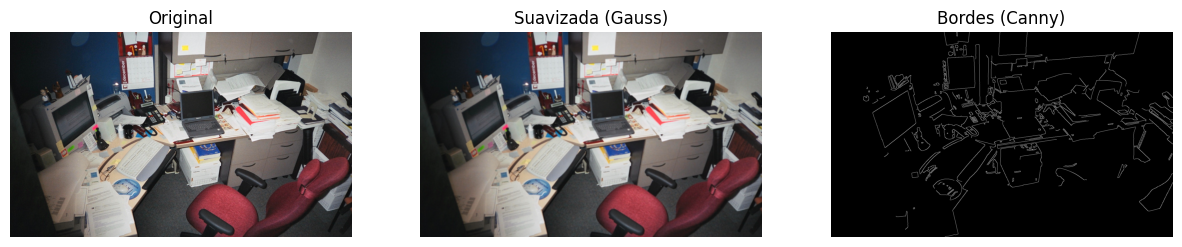


image 1/1 /content/image.jpg: 384x640 1 chair, 1 tv, 1 laptop, 3 keyboards, 3 books, 152.0ms
Speed: 4.4ms preprocess, 152.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


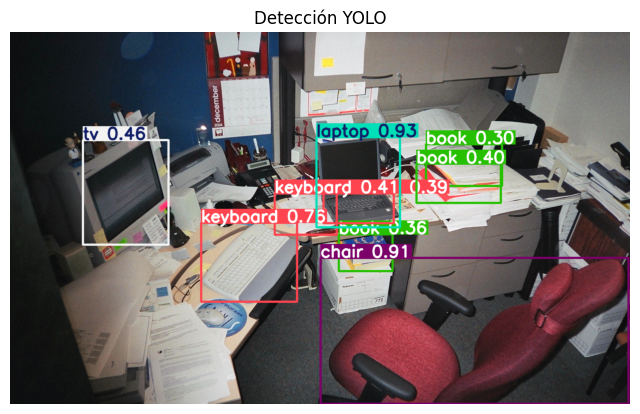

Resultados guardados en: resultados/suavizado.png, resultados/bordes.png, resultados/deteccion_yolo.png


In [6]:
# Ejercicio 1: Procesamiento de Imagen y Detección con YOLO
# Asegúrate de ejecutar esta celda para instalar dependencias:
# !pip install ultralytics opencv-python matplotlib torch

import os
import cv2
import matplotlib.pyplot as plt

# Crear carpeta de resultados
output_dir = 'resultados'
os.makedirs(output_dir, exist_ok=True)

# Opción 1: usar ultralytics YOLOv8
try:
    from ultralytics import YOLO
    yolo_available = True
except ModuleNotFoundError:
    yolo_available = False

# 1. Cargar la imagen
img_path = 'image.jpg'
img = cv2.imread(img_path)
# Convertir de BGR a RGB para matplotlib
t_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Aplicar filtro de suavizado (Gaussian Blur)
img_gauss = cv2.GaussianBlur(img, (7, 7), 0)
t_gauss = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
# Guardar imagen suavizada
suavizado_path = os.path.join(output_dir, 'suavizado.png')
cv2.imwrite(suavizado_path, img_gauss)

# 3. Detección de bordes con Canny
gray = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
# Guardar bordes
bordes_path = os.path.join(output_dir, 'bordes.png')
cv2.imwrite(bordes_path, edges)

# 4. Visualizar las tres etapas
titles = ['Original', 'Suavizada (Gauss)', 'Bordes (Canny)']
images = [t_img, t_gauss, edges]

plt.figure(figsize=(15,5))
for i, (title, im) in enumerate(zip(titles, images)):
    plt.subplot(1, 3, i+1)
    if len(im.shape) == 2:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')
plt.show()

# 5. Detección de objetos con YOLO
if yolo_available:
    # Carga modelo pre-entrenado YOLOv8
    yolo_model = YOLO('yolov8n.pt')
    results = yolo_model(img_path, conf=0.25, iou=0.45)
    detected = results[0].plot()
else:
    # Alternativa: YOLOv5 con PyTorch Hub
    import torch
    model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)
    results = model(img[..., ::-1])
    detected = results.render()[0]  # retornan BGR con cajas

# Guardar imagen con bounding boxes y etiquetas
deteccion_path = os.path.join(output_dir, 'deteccion_yolo.png')
cv2.imwrite(deteccion_path, detected)

# Mostrar detección
detected_rgb = cv2.cvtColor(detected, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(detected_rgb)
plt.title('Detección YOLO')
plt.axis('off')
plt.show()

print(f"Resultados guardados en: {suavizado_path}, {bordes_path}, {deteccion_path}")
